## Data description

The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

## Attribute Information

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,6)

## Importing and exploring data

In [4]:
data=pd.read_csv("telescope_data.csv")

In [5]:
data

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [6]:
data=data.drop('Unnamed: 0',axis=1)

In [7]:
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [8]:
data.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [10]:
data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [11]:
data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [12]:
data.duplicated().sum()

115

In [13]:
data.drop_duplicates()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Text(0.5, 1.0, 'Class')

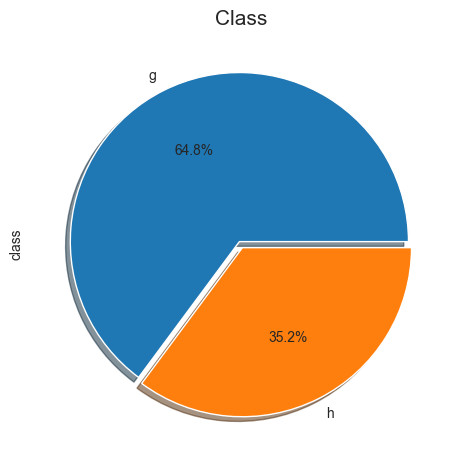

In [14]:
plt.subplot(1, 2, 2)
round(data['class'].value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%1.1f%%', explode=[0.02,0.02],shadow=True)
plt.title('Class', fontsize=15)

## Under Sampling

In [15]:
# Class count
count_class_g, count_class_h = data['class'].value_counts()
print(count_class_g,count_class_h)
# Divide by class
data_class_g = data[data['class'] == 'g']
data_class_h = data[data['class'] == 'h']

12332 6688


Random under-sampling:
g    6688
h    6688
Name: class, dtype: int64


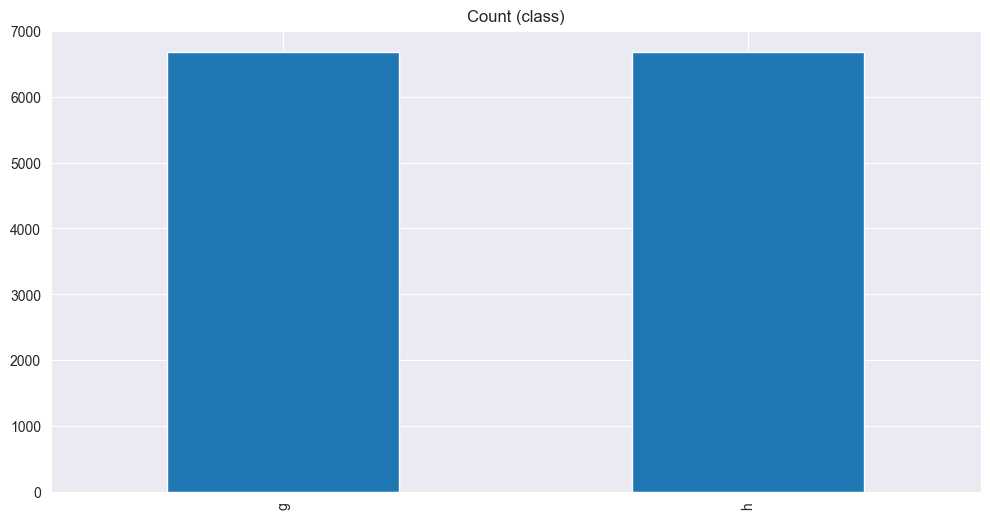

In [16]:
data_class_g_under = data_class_g.sample(count_class_h)
new_data = pd.concat([data_class_g_under, data_class_h], axis=0)

print('Random under-sampling:')
print(new_data['class'].value_counts())

new_data['class'].value_counts().plot(kind='bar', title='Count (class)');

In [17]:
new_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
5871,40.7829,21.4984,3.0490,0.2841,0.1487,22.3380,24.6948,-11.6005,2.0110,177.4000,g
6704,77.3134,18.7524,2.9337,0.2784,0.1485,-39.9458,50.6930,12.1689,5.8814,286.5160,g
7339,60.9957,24.6287,3.0370,0.2149,0.1189,71.6175,-23.9024,-17.8155,7.3080,189.4110,g
1523,37.6527,16.8221,2.7771,0.2723,0.1429,-19.1202,20.2691,-6.7910,74.6315,144.1180,g
8154,42.4526,15.2802,2.7007,0.3008,0.1863,41.1634,25.7461,-3.4215,11.9391,122.8130,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


## Encoding

In [18]:
encoding = {"class":{"g": 0, "h": 1}}

In [19]:
new_data = new_data.replace(encoding)

In [20]:
new_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
5871,40.7829,21.4984,3.0490,0.2841,0.1487,22.3380,24.6948,-11.6005,2.0110,177.4000,0
6704,77.3134,18.7524,2.9337,0.2784,0.1485,-39.9458,50.6930,12.1689,5.8814,286.5160,0
7339,60.9957,24.6287,3.0370,0.2149,0.1189,71.6175,-23.9024,-17.8155,7.3080,189.4110,0
1523,37.6527,16.8221,2.7771,0.2723,0.1429,-19.1202,20.2691,-6.7910,74.6315,144.1180,0
8154,42.4526,15.2802,2.7007,0.3008,0.1863,41.1634,25.7461,-3.4215,11.9391,122.8130,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = new_data.drop(["class"], axis=1)
y = new_data["class"].values
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

In [99]:
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
model=CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

0:	learn: 0.5658774	total: 161ms	remaining: 1.45s
1:	learn: 0.4959187	total: 217ms	remaining: 867ms
2:	learn: 0.4460679	total: 281ms	remaining: 655ms
3:	learn: 0.4182838	total: 334ms	remaining: 501ms
4:	learn: 0.3975223	total: 392ms	remaining: 392ms
5:	learn: 0.3829481	total: 445ms	remaining: 297ms
6:	learn: 0.3706992	total: 497ms	remaining: 213ms
7:	learn: 0.3626002	total: 549ms	remaining: 137ms
8:	learn: 0.3533778	total: 615ms	remaining: 68.3ms
9:	learn: 0.3466016	total: 682ms	remaining: 0us
0.8554205607476636
0.8553811659192825
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1338
           1       0.89      0.81      0.85      1338

    accuracy                           0.86      2676
   macro avg       0.86      0.86      0.86      2676
weighted avg       0.86      0.86      0.86      2676



In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [108]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='tanh'))

model.add(Dense(units=15,activation='elu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))


In [110]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1
          )

Epoch 1/600
335/335 [==============================] - 3s 4ms/step - loss: 0.4722 - accuracy: 0.7746 - val_loss: 0.3873 - val_accuracy: 0.8281
Epoch 2/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8198 - val_loss: 0.3599 - val_accuracy: 0.8487
Epoch 3/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3834 - accuracy: 0.8267 - val_loss: 0.3561 - val_accuracy: 0.8378
Epoch 4/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.8307 - val_loss: 0.3433 - val_accuracy: 0.8554
Epoch 5/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.8350 - val_loss: 0.3371 - val_accuracy: 0.8621
Epoch 6/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3637 - accuracy: 0.8378 - val_loss: 0.3351 - val_accuracy: 0.8606
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.8378 - val_loss: 0.3359 - val_accuracy: 0.8614

In [113]:
test_loss, test_acc = model.evaluate(x_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8509


In [49]:
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
335/335 [==============================] - 3s 4ms/step - loss: 0.4839 - accuracy: 0.7757 - val_loss: 0.4102 - val_accuracy: 0.8150
Epoch 2/600
335/335 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8145 - val_loss: 0.3908 - val_accuracy: 0.8322
Epoch 3/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3906 - accuracy: 0.8239 - val_loss: 0.3806 - val_accuracy: 0.8367
Epoch 4/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3809 - accuracy: 0.8297 - val_loss: 0.3731 - val_accuracy: 0.8416
Epoch 5/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8347 - val_loss: 0.3673 - val_accuracy: 0.8501
Epoch 6/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3687 - accuracy: 0.8366 - val_loss: 0.3631 - val_accuracy: 0.8498
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8367 - val_loss: 0.3597 - val_accuracy: 0.8501

<AxesSubplot: >

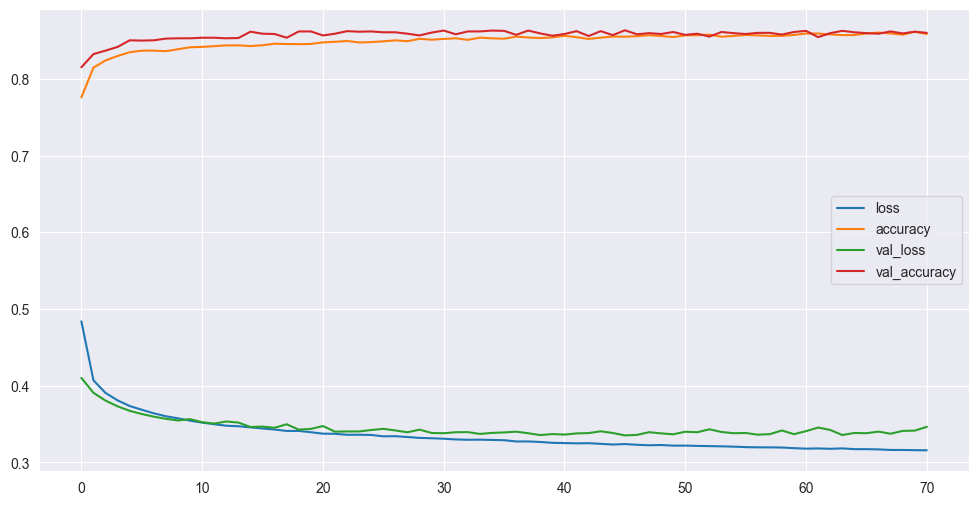

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8599


In [52]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=30,activation='elu'))
model.add(Dense(units=15,activation='elu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=10,activation='tanh'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
335/335 [==============================] - 4s 4ms/step - loss: 0.4635 - accuracy: 0.7866 - val_loss: 0.4071 - val_accuracy: 0.8165
Epoch 2/600
335/335 [==============================] - 1s 3ms/step - loss: 0.4019 - accuracy: 0.8185 - val_loss: 0.3982 - val_accuracy: 0.8229
Epoch 3/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3860 - accuracy: 0.8231 - val_loss: 0.3724 - val_accuracy: 0.8382
Epoch 4/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8296 - val_loss: 0.3640 - val_accuracy: 0.8449
Epoch 5/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3674 - accuracy: 0.8360 - val_loss: 0.3634 - val_accuracy: 0.8460
Epoch 6/600
335/335 [==============================] - 2s 6ms/step - loss: 0.3624 - accuracy: 0.8366 - val_loss: 0.3557 - val_accuracy: 0.8479
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3576 - accuracy: 0.8345 - val_loss: 0.3578 - val_accuracy: 0.8494

In [53]:
test_loss, test_acc = model.evaluate(x_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8531


In [56]:
model = Sequential()
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=40,activation='elu'))
model.add(Dense(units=30,activation='elu'))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='elu'))
model.add(Dense(units=10,activation='elu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
335/335 [==============================] - 4s 5ms/step - loss: 0.4349 - accuracy: 0.7940 - val_loss: 0.3836 - val_accuracy: 0.8345
Epoch 2/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8278 - val_loss: 0.3692 - val_accuracy: 0.8363
Epoch 3/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3668 - accuracy: 0.8356 - val_loss: 0.3606 - val_accuracy: 0.8453
Epoch 4/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.8403 - val_loss: 0.3513 - val_accuracy: 0.8479
Epoch 5/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3498 - accuracy: 0.8393 - val_loss: 0.3574 - val_accuracy: 0.8513
Epoch 6/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8429 - val_loss: 0.3605 - val_accuracy: 0.8386
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3409 - accuracy: 0.8432 - val_loss: 0.3445 - val_accuracy: 0.8479

<AxesSubplot: >

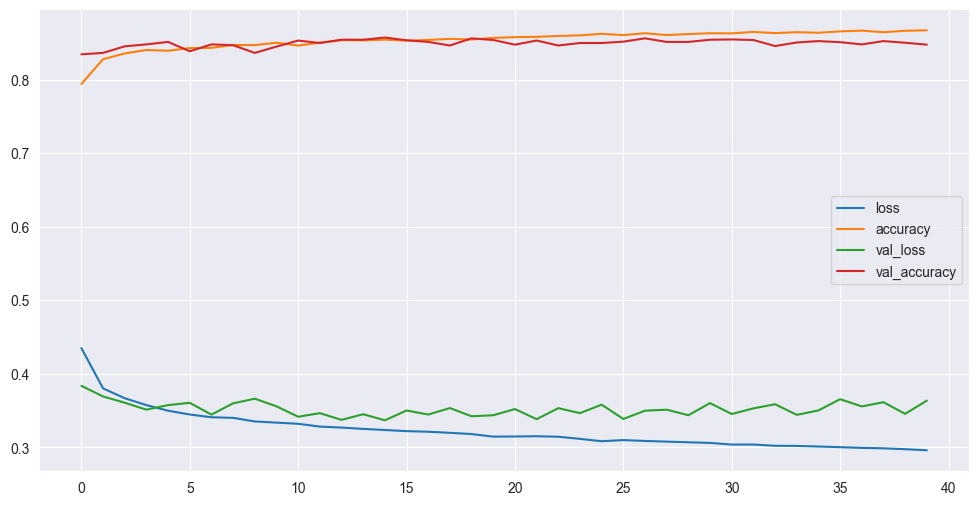

In [57]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8475


In [59]:
model = Sequential()
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=40,activation='elu'))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
335/335 [==============================] - 4s 7ms/step - loss: 0.4606 - accuracy: 0.7828 - val_loss: 0.4015 - val_accuracy: 0.8281
Epoch 2/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3919 - accuracy: 0.8248 - val_loss: 0.3899 - val_accuracy: 0.8307
Epoch 3/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8341 - val_loss: 0.3688 - val_accuracy: 0.8457
Epoch 4/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3700 - accuracy: 0.8357 - val_loss: 0.3735 - val_accuracy: 0.8464
Epoch 5/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 0.8382 - val_loss: 0.3669 - val_accuracy: 0.8483
Epoch 6/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8399 - val_loss: 0.3567 - val_accuracy: 0.8509
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3576 - accuracy: 0.8399 - val_loss: 0.3586 - val_accuracy: 0.8479

<AxesSubplot: >

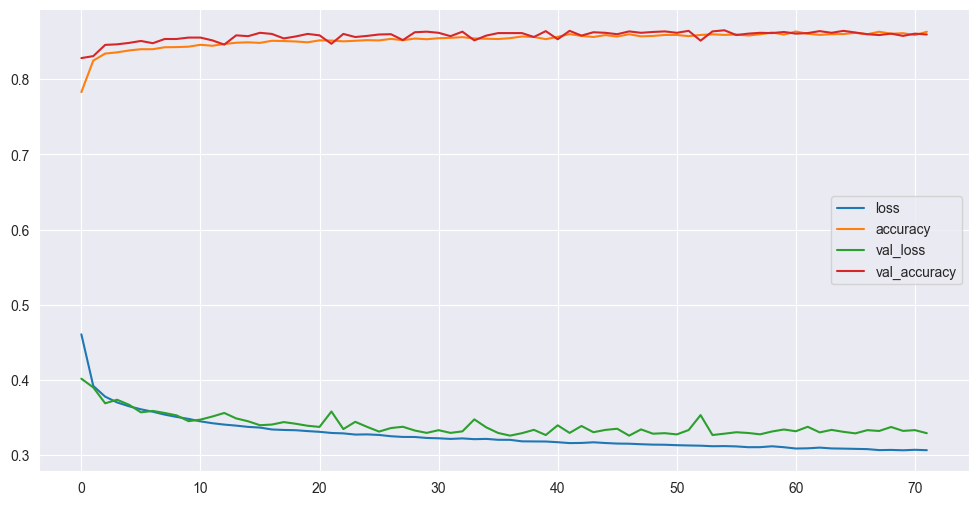

In [60]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [61]:
test_loss, test_acc = model.evaluate(x_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8595


In [62]:
model = Sequential()
model.add(Dense(units=35,activation='tanh'))
model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
335/335 [==============================] - 10s 3ms/step - loss: 0.4702 - accuracy: 0.7764 - val_loss: 0.4002 - val_accuracy: 0.8232
Epoch 2/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8211 - val_loss: 0.3763 - val_accuracy: 0.8393
Epoch 3/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8264 - val_loss: 0.3651 - val_accuracy: 0.8457
Epoch 4/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3671 - accuracy: 0.8320 - val_loss: 0.3573 - val_accuracy: 0.8453
Epoch 5/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3604 - accuracy: 0.8361 - val_loss: 0.3485 - val_accuracy: 0.8490
Epoch 6/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8362 - val_loss: 0.3456 - val_accuracy: 0.8509
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8393 - val_loss: 0.3441 - val_accuracy: 0.853

In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test)

84/84 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8531


In [65]:
model = Sequential()
model.add(Dense(units=80,activation='elu'))
model.add(Dense(units=80,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
335/335 [==============================] - 15s 9ms/step - loss: 0.4259 - accuracy: 0.7997 - val_loss: 0.3863 - val_accuracy: 0.8378
Epoch 2/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3767 - accuracy: 0.8294 - val_loss: 0.3718 - val_accuracy: 0.8404
Epoch 3/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.8346 - val_loss: 0.3616 - val_accuracy: 0.8475
Epoch 4/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3568 - accuracy: 0.8384 - val_loss: 0.3546 - val_accuracy: 0.8535
Epoch 5/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3516 - accuracy: 0.8446 - val_loss: 0.3593 - val_accuracy: 0.8453
Epoch 6/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8425 - val_loss: 0.3604 - val_accuracy: 0.8498
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3476 - accuracy: 0.8447 - val_loss: 0.3484 - val_accuracy: 0.857

<AxesSubplot: >

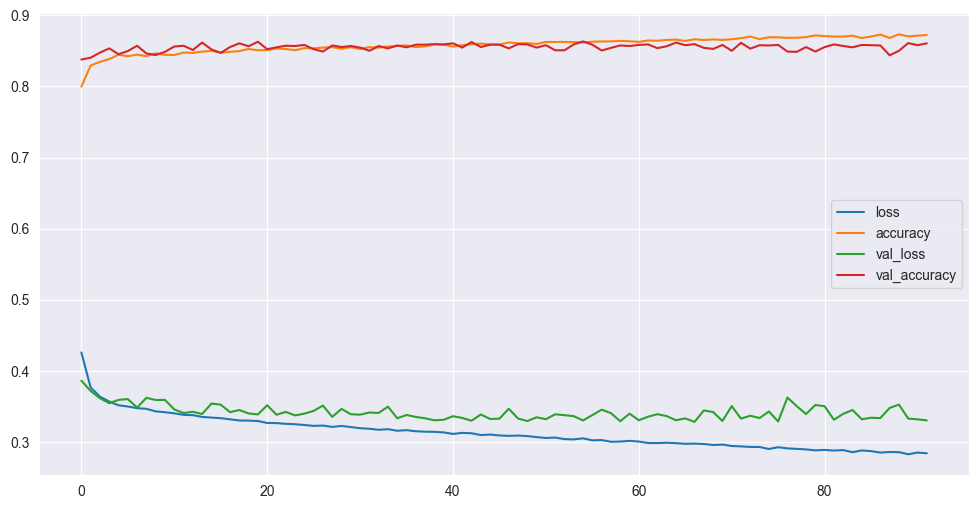

In [66]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [67]:
test_loss, test_acc = model.evaluate(x_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8606


In [69]:
model = Sequential()
model.add(Dense(units=80,activation='elu'))
model.add(Dense(units=80,activation='relu'))
model.add(Dense(units=70,activation='elu'))
model.add(Dense(units=70,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
335/335 [==============================] - 25s 4ms/step - loss: 0.4150 - accuracy: 0.8051 - val_loss: 0.3922 - val_accuracy: 0.8318
Epoch 2/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.8311 - val_loss: 0.3767 - val_accuracy: 0.8359
Epoch 3/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.8398 - val_loss: 0.3563 - val_accuracy: 0.8412
Epoch 4/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8433 - val_loss: 0.3509 - val_accuracy: 0.8453
Epoch 5/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8452 - val_loss: 0.3373 - val_accuracy: 0.8498
Epoch 6/600
335/335 [==============================] - 1s 4ms/step - loss: 0.3403 - accuracy: 0.8454 - val_loss: 0.3433 - val_accuracy: 0.8565
Epoch 7/600
335/335 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8493 - val_loss: 0.3587 - val_accuracy: 0.848

84/84 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8602


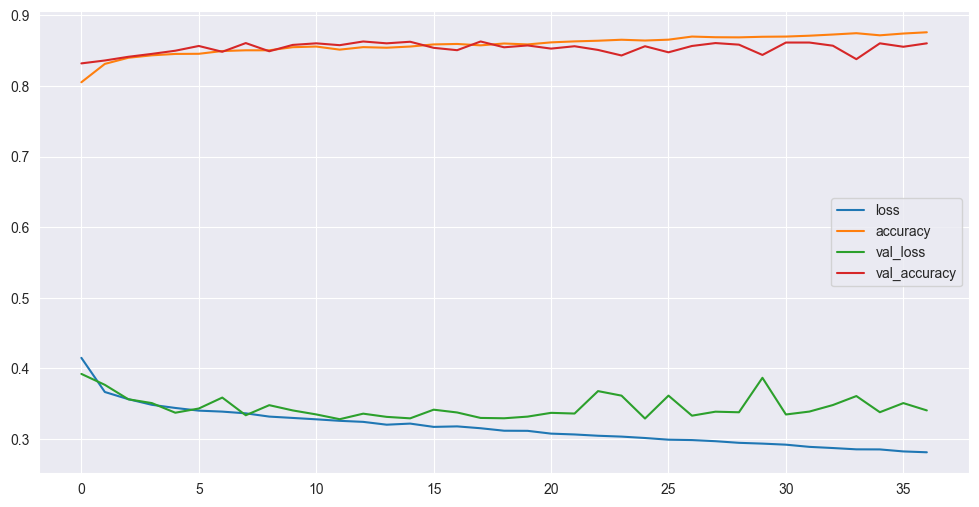

In [70]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
test_loss, test_acc = model.evaluate(x_test, y_test)